Plots win rate of victim X vs. an adversary trained on victim Y.

In [1]:
import matplotlib.pyplot as plt

import utils

utils.set_plot_formatting()

### Adversary trained on cp505

In [2]:
df = utils.parse_sgfs(["/nas/ucb/tony/go-attack/matches/cp505-adv-emcts1.4/sgfs"])

# Filter out games with two adversaries
adv_is_black = df.b_name.str.contains("adv")
adv_is_white = df.w_name.str.contains("adv")
df = df[~(adv_is_black & adv_is_white)].copy()
utils.parse_for_match(df, victim_name_prefix="bot-cp127-v")
df["victim_net"] = df.victim_name.str.slice(start=len("bot-"), stop=len("bot-cp505"))

print(len(df))
print(df.victim_name.unique())
print(df.victim_net.unique())
print(df.victim_visits.unique())
print(df.adv_name.unique())

10932
['bot-cp127-v8' 'bot-cp505-v32' 'bot-cp505-v16' 'bot-cp127-v256'
 'bot-cp127-v2' 'bot-cp127-v512' 'bot-cp127-v64' 'bot-cp505-v8'
 'bot-cp127-v16' 'bot-cp127-v32' 'bot-cp127-v4' 'bot-cp127-v1'
 'bot-cp505-v1' 'bot-cp505-v128' 'bot-cp505-v64' 'bot-cp127-v128'
 'bot-cp505-v2' 'bot-cp505-v512' 'bot-cp505-v256' 'bot-cp505-v4']
['cp127' 'cp505']
[  8  32  16 256   2 512  64   4   1 128]
['adv-cp505-v1-s34090496-v600' 'adv-cp505-v1-s59042304-v600']


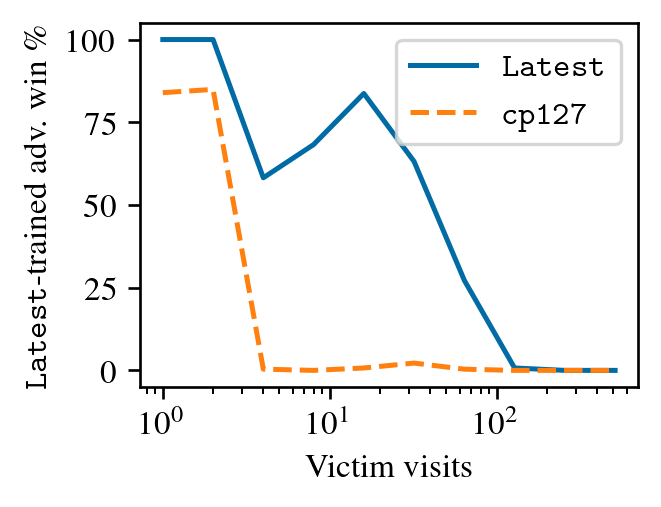

In [3]:
fig, axs = plt.subplots(
    1,
    1,
    constrained_layout=True,
    figsize=(utils.TWO_COL_PLOT_WIDTH, 2),
    dpi=240,
)

adv_name: str = "adv-cp505-v1-s34090496-v600"
victim_net: str
for victim_net in reversed(df.victim_net.unique()):
    (
        100
        * df.query(f"adv_name == '{adv_name}' & victim_net == '{victim_net}'")
        .groupby("victim_visits")
        .mean(numeric_only=True)
        .adv_win
    ).plot(
        label="$\\texttt{Latest}$" if victim_net == "cp505" else "$\\texttt{cp127}$",
        linestyle="--" if victim_net == "cp127" else None,
    )

plt.ylim(-5, 105)
plt.xscale("log")
plt.ylabel("$\\texttt{Latest}$-trained adv. win \\%")
# plt.title("cp505 adversary vs. victims")
plt.xlabel("Victim visits")
plt.legend()

plt.savefig("adv505-transfer.pgf", backend="pgf")

### b10 adversary trained on cp127

In [4]:
df = utils.parse_sgfs(["/nas/ucb/ttseng/go_attack/match/b10-vs-v1to1024/sgfs"])
utils.parse_for_match(df, victim_name_prefix="bot-cp505-v")
df["victim_net"] = df.victim_name.str.slice(start=len("bot-"), stop=len("bot-cp505"))

print(len(df))
print(df.victim_name.unique())
print(df.victim_net.unique())
print(df.victim_visits.unique())
print(df.adv_name.unique())

1100
['bot-cp505-v2' 'bot-cp127-v2' 'bot-cp127-v32' 'bot-cp127-v1'
 'bot-cp127-v16' 'bot-cp505-v1' 'bot-cp505-v4' 'bot-cp505-v256'
 'bot-cp127-v512' 'bot-cp127-v64' 'bot-cp505-v512' 'bot-cp505-v8'
 'bot-cp505-v1024' 'bot-cp127-v256' 'bot-cp127-v8' 'bot-cp505-v128'
 'bot-cp505-v16' 'bot-cp127-v4' 'bot-cp505-v32' 'bot-cp127-v1024'
 'bot-cp505-v64' 'bot-cp127-v128']
['cp505' 'cp127']
[   2   32    1   16    4  256  512   64    8 1024  128]
['adv-s230746880-d58018066-v600']


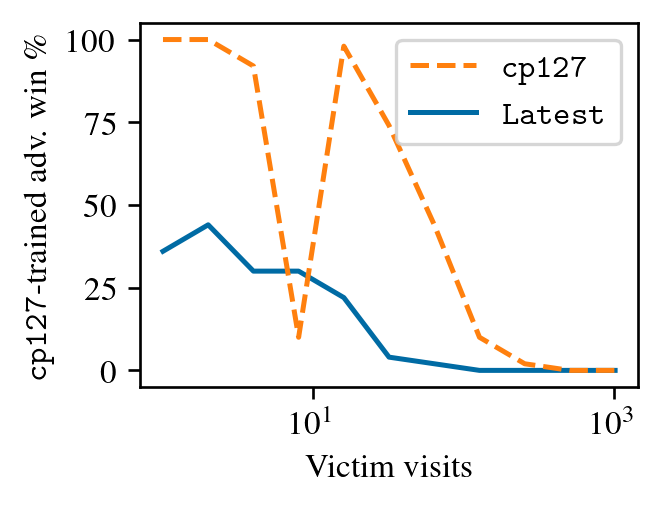

In [5]:
fig, axs = plt.subplots(
    1,
    1,
    constrained_layout=True,
    figsize=(utils.TWO_COL_PLOT_WIDTH, 2),
    dpi=240,
)

victim_net: str
for victim_net in df.victim_net.unique():
    (
        100
        * df.query(f"victim_net == '{victim_net}'")
        .groupby("victim_visits")
        .mean(numeric_only=True)
        .adv_win
    ).plot(
        label="$\\texttt{Latest}$" if victim_net == "cp505" else "$\\texttt{cp127}$",
        linestyle="--" if victim_net == "cp127" else None,
    )

plt.ylim(-5, 105)
plt.xscale("log")
plt.ylabel("$\\texttt{cp127}$-trained adv. win \\%")
# plt.title("cp505 adversary vs. victims")
plt.xlabel("Victim visits")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])
# plt.legend();
plt.savefig("adv127-transfer.pgf", backend="pgf")